Problem is, we should only update 'conn' and not 'wMat'

In [1]:
from datagen import DataGenerator
from fineNeat.sneat_jax.ind import Ind
from jax import numpy as jnp 

generator = DataGenerator(train_size=2000, batch_size=1000)
choice_id = 0
nInput = 2
nOutput = 2 

train_data, test_data = generator.generate_random_dataset(choice=choice_id)  # 0 for circle dataset

ind = Ind.from_shapes([(nInput, 5), (5, 5), (5, nOutput)], act_id=9)
ind.express()


True

In [2]:
from fineNeat.sneat_jax.ann import * 
from tune import train_ind 

# For same individual, different training runs lead to different results, too 
new_ind = train_ind(ind, train_data, generator, learning_rate=0.01, n_epochs=800, interval=50, nInput=2, nOutput=2)[0]

Epoch 1, Loss: 1.5438677072525024
Epoch 51, Loss: 0.3837217688560486
Epoch 101, Loss: 0.35286691784858704
Epoch 151, Loss: 0.3328506648540497
Epoch 201, Loss: 0.3278520703315735
Epoch 251, Loss: 0.24271705746650696
Epoch 301, Loss: 0.19713856279850006
Epoch 351, Loss: 0.17695419490337372
Epoch 401, Loss: 0.15685708820819855
Epoch 451, Loss: 0.14741529524326324
Epoch 501, Loss: 0.1402951180934906
Epoch 551, Loss: 0.13043101131916046
Epoch 601, Loss: 0.13275723159313202
Epoch 651, Loss: 0.12554793059825897
Epoch 701, Loss: 0.11413542926311493
Epoch 751, Loss: 0.10307306051254272


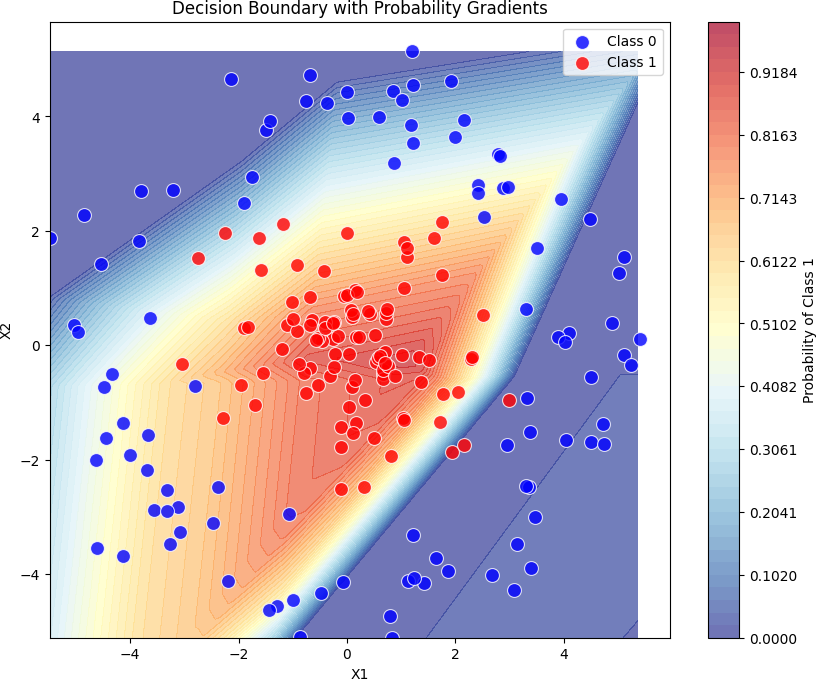

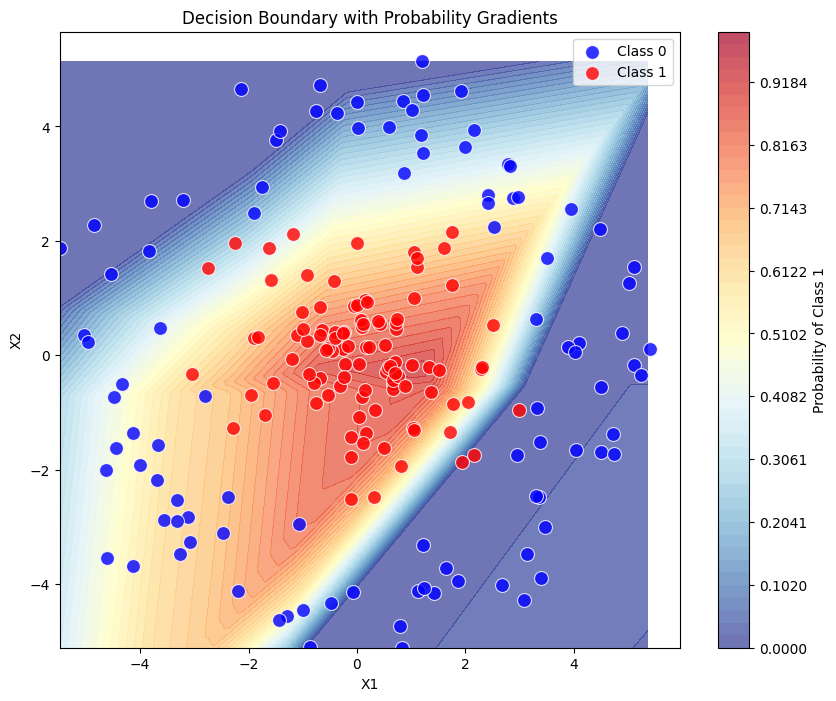

In [6]:
from fineNeat import viewInd, fig2img 
from viz import plot_decision_boundary
import matplotlib.pyplot as plt

# viewInd(new_ind)
fig, ax = plot_decision_boundary(new_ind.wMat, new_ind.aVec, nInput, nOutput, test_data)

img = fig2img(fig)
img


NEAT-backprop training on classification dataset

In [1]:
# Two Stage Training: topology search with NEAT, weight search with backprop (essentially replacing SNeat)
# - for simplicity, let's pick best few species at the end of NEAT stage, and do backprop on them, then select the best one and propagate into NEAT stage to do further search 
# - this way we reduce the workload a bit and have a more clear separation between the stages ... since we know SNeat works well for SlimeVolleyBall 


from fineNeat import Neat 
from fineNeat import loadHyp, updateHyp, load_cls_task
from datagen import DataGenerator
from tune import get_reward

choice_id = 0
generator = DataGenerator(train_size=2000, batch_size=1000)
train_data, test_data = generator.generate_random_dataset(choice=choice_id)  # 0 for circle dataset


hyp_default = '../fineNeat/fineNeat/p/cls.json'
hyp_adjust = '../fineNeat/fineNeat/p/cls_neat.json'
fileName = "cls"

hyp = loadHyp(pFileName=hyp_default, load_task=load_cls_task)
updateHyp(hyp,load_cls_task,hyp_adjust)

Two-Stage neat-backprop 
* Stage 1: NEAT topology search 
* Stage 2: Backprop on top individuals per species

In [ ]:
from tune import get_reward, jnp, train_ind
from fineNeat.sneat_jax.ind import Ind 

# Iterate 2-stage neat-backprop 
# First Stage features NEAT topology search 
# neat = Neat(hyp)
best_ind = None 
top_reward = 0.9
learning_rate = 0.01
n_epochs = 800
n_top_seed = 4
nInput, nOutput = 2, 2

for iter in range(1): 
    
    pop = []
    for _ in range(16): 
        ind = Ind.from_shapes([(2, 5), (5, 5), (5, 2)])
        ind.express()
        child, _ = ind.mutate(hyp)
        child.express()
        pop.append(child)
        
    print("\n :: Start BackProp on top 4 individuals")
    top_individuals = []
    for ind in pop:  
        new_ind = train_ind(ind, train_data, generator, learning_rate=learning_rate, n_epochs=n_epochs, interval=50, nInput=2, nOutput=2)[0]
        reward_value = get_reward([ind], test_data, nInput, nOutput)
        ind.fitness = reward_value[0]
        top_individuals.append(ind)
    
    best_ind = sorted(top_individuals, key=lambda x: x.fitness, reverse=True)[0]
    print("Best fitness after BackProp: ", best_ind.fitness)


 :: Start BackProp on top 4 individuals
Epoch 1, Loss: 2.695373058319092
Epoch 51, Loss: 0.408372700214386
Epoch 101, Loss: 0.3717362582683563
Epoch 151, Loss: 0.33446046710014343
Epoch 201, Loss: 0.3394595682621002
Epoch 251, Loss: 0.32521143555641174
Epoch 301, Loss: 0.3276011645793915
Epoch 351, Loss: 0.21402955055236816
Epoch 401, Loss: 0.169180765748024
Epoch 451, Loss: 0.15402351319789886
Epoch 501, Loss: 0.1444551646709442
Epoch 551, Loss: 0.13154281675815582
Epoch 601, Loss: 0.12872610986232758
Epoch 651, Loss: 0.13376224040985107
Epoch 701, Loss: 0.1270715594291687
Epoch 751, Loss: 0.12467864155769348
Epoch 1, Loss: 2.716554641723633
Epoch 51, Loss: 0.42113611102104187
Epoch 101, Loss: 0.3667638599872589
Epoch 151, Loss: 0.3462415933609009
Epoch 201, Loss: 0.31737279891967773
Epoch 251, Loss: 0.3303375244140625
Epoch 301, Loss: 0.32133302092552185
Epoch 351, Loss: 0.22040414810180664
Epoch 401, Loss: 0.17619648575782776
Epoch 451, Loss: 0.15238840878009796
Epoch 501, Loss: 0.

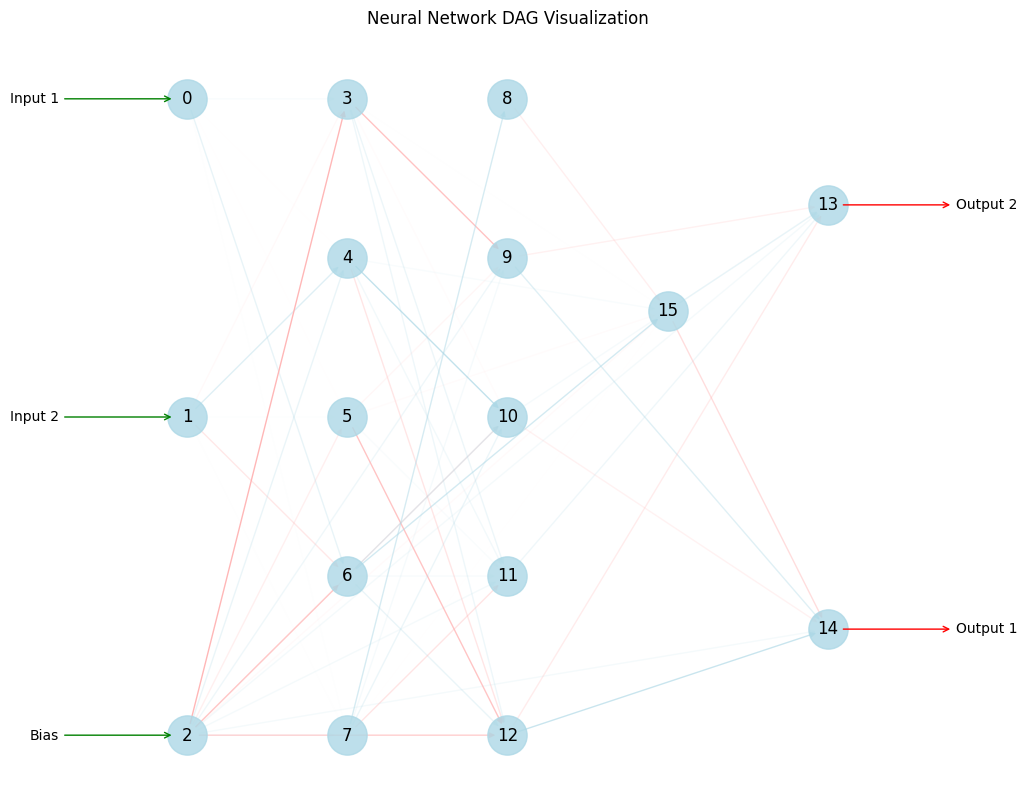

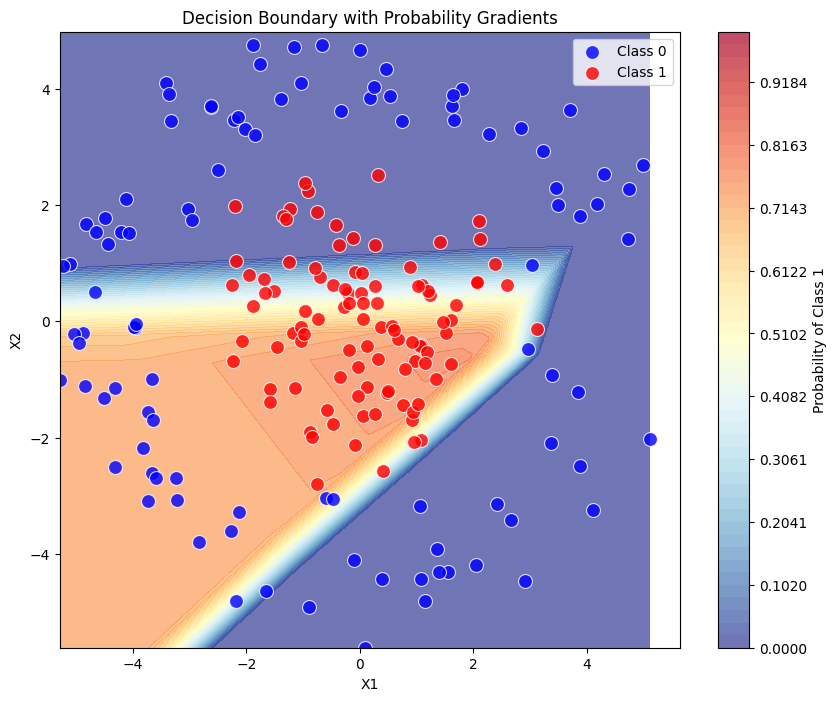

In [4]:
from fineNeat import viewInd 
viewInd(best_ind)

from viz import plot_decision_boundary
nInput, nOutput = 2, 2
plot_decision_boundary(best_ind.wMat, best_ind.aVec, nInput, nOutput, test_data)


In [7]:
fig, ax = plot_decision_boundary(best_ind.wMat, best_ind.aVec, nInput, nOutput, test_data)


NameError: name 'best_ind' is not defined